## Problema 1

### Funções de suporte e principais definições

In [24]:
# pip install tk

In [25]:
import tkinter as tk
from tkinter import ttk

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, linalg

In [27]:
global option

In [28]:
## Definição das funções 
# f = −∆u(x, y)

u = lambda x,y: x**4 - 6*x**2*y**2 + y**4 # item (a)   
f_u = lambda x,y: -12*(x**2 + y**2)

v = lambda x,y: np.exp(x) * np.sin(y) # item (b)
f_v = lambda x,y: -np.exp(x) * np.sin(y)

In [29]:
def poisson_system(N: int, f: float, g: float):
    h = 1/N
    n = (N-1)**2 
    diagonals = [-1, -1, 4, -1, -1]
    offsets = [-N+1, -1, 0, 1, N-1] #confere o deslocamento das diagonais
    
    # matriz A 
    A: csc_array = diags(diagonals=diagonals, offsets=offsets, shape=(n,n)).tocsc()
    
    # vetor b (termos da equação e cond. de contorno)
    b = np.zeros(n)

    # Preenchimento de b com f (pontos internos)
    for k in range(1, N):
        for j in range(1, N):
            i = (k - 1) * (N-1) + (j-1) # ordem lexicográfica
            x, y = k * h, j * h
            b[i] = h ** 2 * f(x, y)
    
    # Bordas (esq -> dir) & (inf -> sup): condições de contorno
            if k == 1:
                b[i] -= g(0, y)  # borda esquerda
            if k == N - 1:
                b[i] -= g(1, y)  # borda direita
            if j == 1:
                b[i] -= g(x, 0)  # borda inferior
            if j == N - 1:
                b[i] -= g(x, 1)  # borda superior
    
    return A, b

In [30]:
def plot_solution(N: int, exact_sol: float, numeric_sol: float, title: str):
    x = np.linspace(0, 1, N+1)
    y = np.linspace(0, 1, N+1)
    X, Y = np.meshgrid(x, y)

    # Solução exata
    exact = exact_sol(X, Y)

    # Inserir solução numérica nos pontos internos
    numeric = np.zeros((N+1, N+1))
    numeric[1:N, 1:N] = numeric_sol.reshape((N-1, N-1))

    # Gráficos
    fig = plt.figure(figsize=(12, 6))

    # Gráfico 3D da solução exata
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(X, Y, exact, cmap='plasma')
    ax1.set_title(f"Solução exata ($u_{{exata}}$) da {title} - N={N}")
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('u')

    # Gráfico de contorno (curvas de nível)
    ax2 = fig.add_subplot(122)
    contour = ax2.contourf(X, Y, exact, cmap='plasma')
    fig.colorbar(contour, ax=ax2)
    ax2.set_title(f"Curvas de nível de $u_{{exata}}$")
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')

    plt.show()

In [31]:
def prompt(event=None):
    escolha_eq = combo_eq.get()
    escolha_N = combo_N.get()

    if escolha_eq == 'u(x, y) = x^4 - 6x^2y^2 + y^4':
        exact = u
        f = f_u
        title = 'u(x, y) = x^4 - 6x^2y^2 + y^4'
    elif escolha_eq == 'u(x, y) = exp(x) * sin(y)':
        exact = v
        f = f_v
        title = 'u(x, y) = exp(x) * sin(y)'
    else:
        print("Escolha inválida.")
        return

    if escolha_N == 'N = 20':
        N = 20
    elif escolha_N == 'N = 50':
        N = 50
    elif escolha_N == 'N = 100':
        N = 100
    else:
        print("Escolha inválida.")
        return
    
    g = lambda x,y: exact(x,y)

    A, b = poisson_system(N, f, g)
    numeric = linalg.spsolve(A,b)

    plot_solution(N, exact, numeric, title)   


    Resultados gráficos

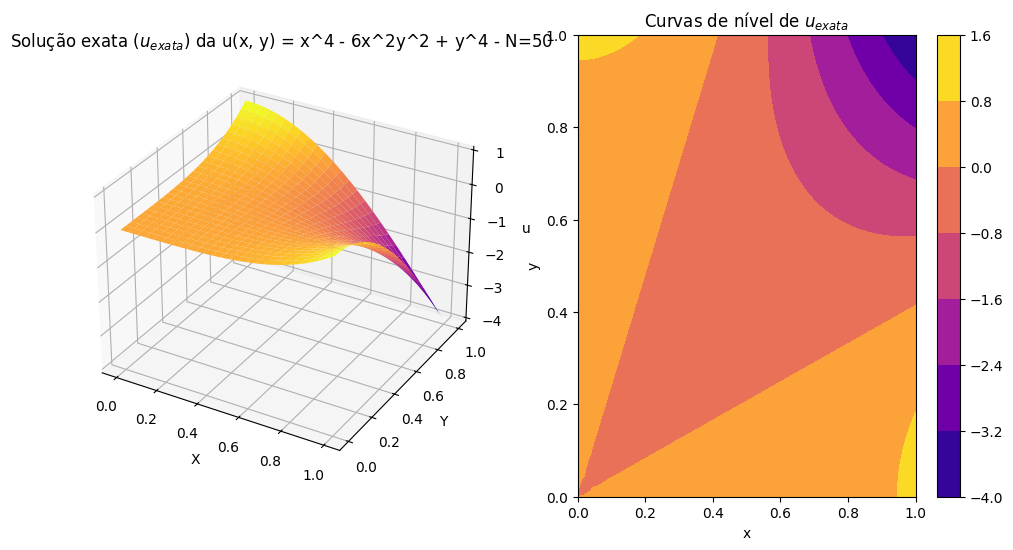

In [34]:
root = tk.Tk()
root.title("Escolha da Equação de Poisson")

# Labels
label_eq = ttk.Label(root, text="Escolha uma equação para resolver:")
label_eq.pack(pady=10)

# Combobox para escolha da equação
combo_eq = ttk.Combobox(root, values=[
    'u(x, y) = x^4 - 6x^2y^2 + y^4',
    'u(x, y) = exp(x) * sin(y)'
])
combo_eq.pack(pady=10)
combo_eq.current(0)  # Seleciona a primeira equação como padrão

# Combobox para escolha de N
label_N = ttk.Label(root, text="Escolha um valor de N:")
label_N.pack(pady=10)

combo_N = ttk.Combobox(root, values=[
    'N = 20',
    'N = 50',
    'N = 100'
])
combo_N.pack(pady=10)
combo_N.current(0)  # Seleciona N = 20 como padrão

# Botão para resolver a equação
btn_resolver = ttk.Button(root, text="Resolver", command=prompt)
btn_resolver.pack(pady=20)

# Label para mostrar o resultado
resultado_label = ttk.Label(root, text="")
resultado_label.pack(pady=10)

root.mainloop()